In [271]:
#logistic regression 
# 1.Data preparation
# 2.visulization
# 3. create logistic regression model
# 4. prediction 
# 5.decision baundary 
# 6 .how to use sklearn 


In [272]:
#Data -Generate using numpy
import numpy as np 
import matplotlib.pyplot as plt 

In [273]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5 ])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)#distribution
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)
print(dist_01.shape)
print(dist_02.shape)
#here we have two clusters


(500, 2)
(500, 2)


<ipython-input-274-38bd3331c0a0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


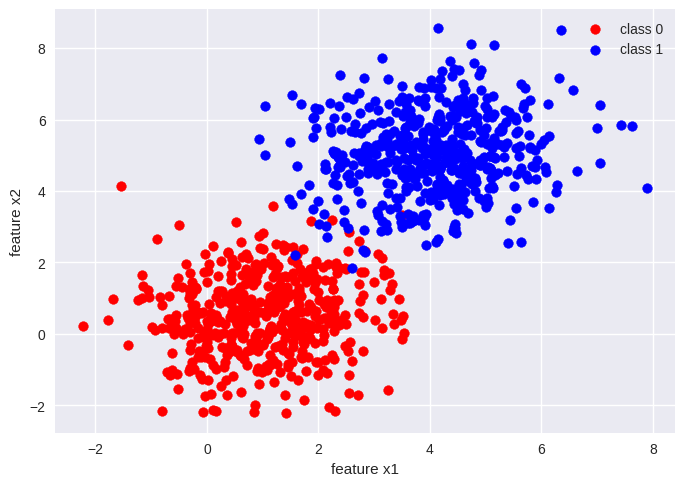

In [274]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color='blue',label="class 1" )
plt.xlabel("feature x1")
plt.ylabel("feature x2")
plt.legend()
plt.show()

In [275]:
#putting the data into a matrix or crating the data matrix 

data =np.zeros((1000,3))
data[:500,:2]=dist_01#first 500 rows ,and first 2columns 
data[500:,:2]=dist_02#last 500 rows , and first 2 columns
data[500:,-1]=1 #last 500 rows and last column
data

array([[-0.22875248, -0.98330624,  0.        ],
       [-0.04314261, -1.73637983,  0.        ],
       [ 2.15596638,  0.95691397,  0.        ],
       ...,
       [ 2.26548168,  4.23331811,  1.        ],
       [ 3.57442575,  6.4408076 ,  1.        ],
       [ 2.84997556,  5.75366749,  1.        ]])

In [276]:
# randomly shuffle the data 
np.random.shuffle(data)
print(data[:10])

[[ 3.56586537  4.00467439  1.        ]
 [ 1.72432642 -0.22627725  0.        ]
 [ 5.52842058  6.08265917  1.        ]
 [ 3.81593188  3.71868577  1.        ]
 [ 1.13449691 -0.86377615  0.        ]
 [ 5.92992956  4.87626577  1.        ]
 [-0.2880953  -0.28451381  0.        ]
 [ 5.08040051  4.99133353  1.        ]
 [ 2.10692369 -0.02389649  0.        ]
 [ 4.26218589  5.70335744  1.        ]]


In [277]:
# Divide the data into train and test part 
split=int (0.8*data.shape[0])
x_train=data[:split,:-1]
x_test=data[split:,:-1]

y_train=data[:split,-1]
y_test=data[split:,-1]
print (x_train.shape,x_test.shape,y_train.shape , y_test.shape )


(800, 2) (200, 2) (800,) (200,)


In [278]:
print (x_train)
print(y_train)

[[ 3.56586537  4.00467439]
 [ 1.72432642 -0.22627725]
 [ 5.52842058  6.08265917]
 ...
 [ 4.57097858  6.3960495 ]
 [ 4.758116    4.20396622]
 [ 0.63990737  0.22072466]]
[1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1

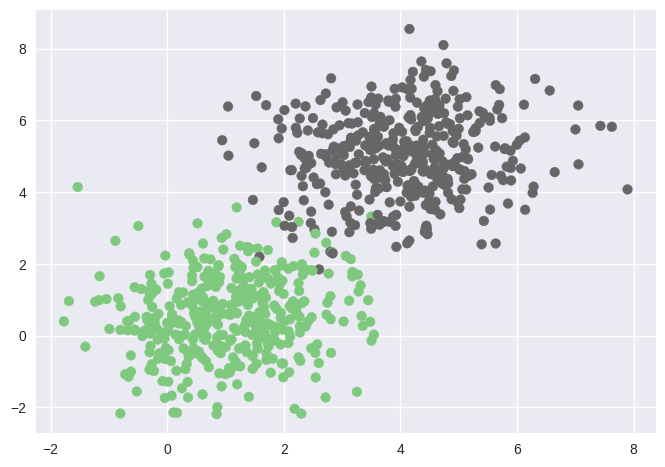

In [279]:
#plot the training data $ normalise it 
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)

[2.54763554 2.81627456]
[1.8480752  2.50747219]
[[ 0.55096775  0.47394338]
 [-0.44549547 -1.21339404]
 [ 1.61291328  1.30266036]
 ...
 [ 1.09483805  1.42764293]
 [ 1.19609876  0.55342256]
 [-1.03227844 -1.0351261 ]]


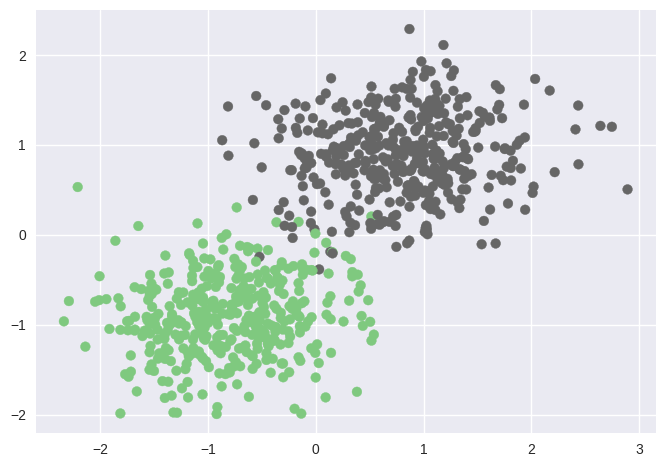

In [280]:
#Data Normalizatio 
x_mean=x_train.mean(axis=0)
print (x_mean)
x_std=x_train.std(axis=0)
print(x_std)
#Apply the Transformation on the train data
x_train =(x_train -x_mean )/x_std
print(x_train)
#applying the transaformation on the test data
x_tets=(x_test-x_mean)/x_std
#plotting the plot of the normalize data
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)

In [281]:
x_train.mean(axis=0)#close to zero 

array([-4.27990976e-16,  4.82947016e-16])

In [282]:
x_train.std(axis=0)#close to one 

array([1., 1.])

In [283]:
#Logistic Regression Implementation
#fuction for sigmoid function
def sigmoid(x):
  return 1.0/(1.0+np.exp(-x)) 
#hypothesis funciton 
def hypothesis(x,theta):
  """
  x-entire array(m,n+1)
  theta-np.array(n+1,1)
  """
  return sigmoid(np.dot(x,theta ))
sigmoid(100)
sigmoid(1000)
#function for error 
def error(x,y,theta):
  """
  params:
  x-(m,n+1)
  y-(m,1)
  theta-(n+1,1)
  return :
  scaler_value =loss
  """
  hi=hypothesis(x,theta)
  error=-1*np.mean((y*np.log(hi)+((1-y)*np.log(1-hi))))
  return error



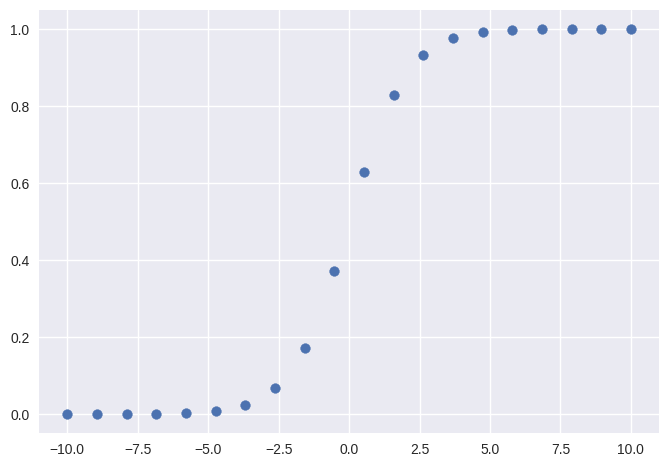

In [284]:
#for testing sigmoid function 
a=np.linspace(-10,10,20)
plt.scatter(a,sigmoid(a ))

In [285]:
#making a gradient descent function to mantain the theta values
def gradient(x,y,theta ):
  """
  params:
  x-(m,n+1)
  y-(m,1)
  theta-(n+1,1)
  return:
  gradient_vector-(n+1,1)
  """
  hi=hypothesis(x,theta)
  grad=-np.dot(x.T,(y-hi))
  m=x.shape[0]
  return grad/m 
def gradient_descent(x,y,lr=0.5,max_itr=500):

  n=x.shape[1]
  theta =np.zeros((n,1))
  error_list=[]
  for i in range (max_itr):
    err=error(x,y,theta)
    error_list.append(err)
    grad=gradient(x,y,theta)
    #update 
    theta =theta-lr*grad


  return (theta ,error_list)




In [286]:
import numpy as np

ones = np.ones((x_train.shape[0], 1))
x_new_train = np.hstack((ones, x_train))
print(x_new_train.shape)
print(x_new_train)
y_train=y_train.reshape((-1,1))#that line had confused me .........hahaha


(800, 3)
[[ 1.          0.55096775  0.47394338]
 [ 1.         -0.44549547 -1.21339404]
 [ 1.          1.61291328  1.30266036]
 ...
 [ 1.          1.09483805  1.42764293]
 [ 1.          1.19609876  0.55342256]
 [ 1.         -1.03227844 -1.0351261 ]]


In [287]:
theta,error_list=gradient_descent(x_new_train,y_train)

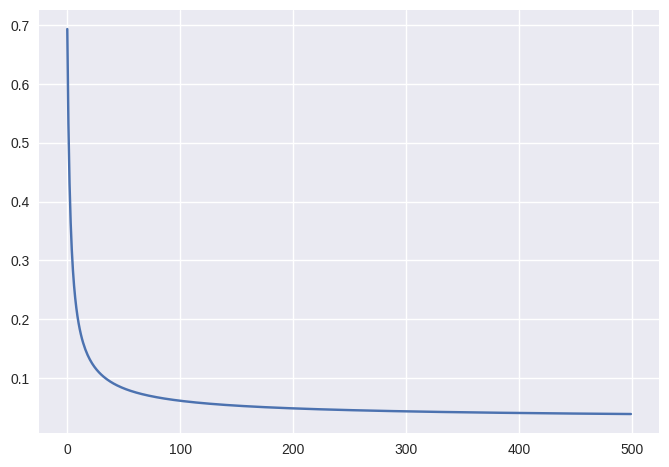

In [288]:
plt.plot(error_list)

In [289]:
theta[0]

array([0.2119661])

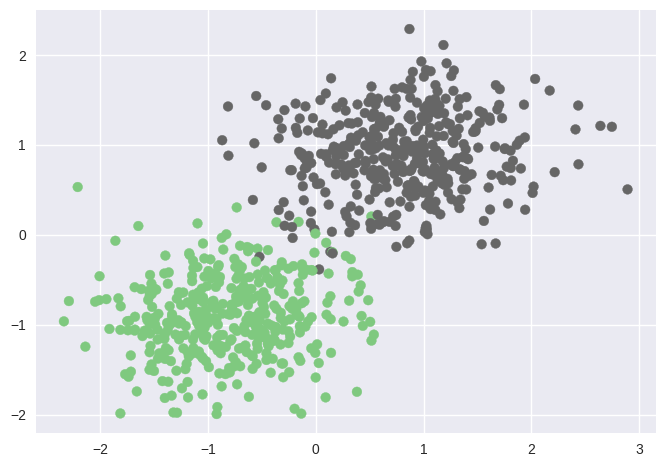

In [293]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()


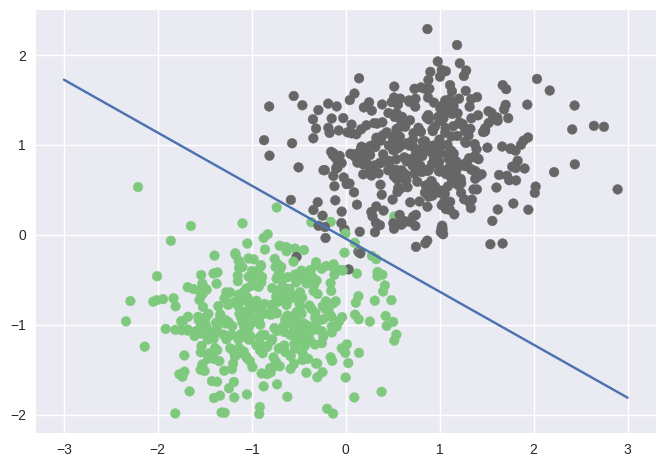

In [296]:
#showing the decision line .............
x1=np.arange(-3,4)
x2=-(theta[0]+theta[1]*x1)/theta[2]
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)


plt.plot(x1,x2)
plt.show()

In [297]:
#predictions $ accuracy 
x_new_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
print(x_new_test.shape)
print( x_new_test[:3,:])

(200, 3)
[[1.         1.614591   2.23084957]
 [1.         6.34922527 8.50786986]
 [1.         0.11565084 2.4565036 ]]


In [309]:
def predict(x,theta):
  h=hypothesis(x,theta)
  output=np.zeros(h.shape)
  output[h>=0.5]=1
  print(output[:5,:])
  output=output.astype('int')
  return output
xt_preds=predict(x_new_train,theta)
xtest_pred=predict(x_new_test,theta)
print(xt_preds)
print(xtest_pred)

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1

In [316]:
#to find the accuracy 
def accuracy (actual ,preds):
  actual=actual.astype('int')
  actual=actual.reshape((-1,1))
  acc=np.sum(actual==preds)/actual.shape[0]
  return acc*100

In [317]:
train_acc=accuracy(y_train,xt_preds)
test_acc=accuracy(y_test,xtest_pred)
print(train_acc)
print(test_acc)

98.75
58.5


In [315]:
xtest_pred.shape

(200, 1)

In [319]:
#using sklearn 
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [322]:
theta_0=model.intercept_
theta_s=model.coef_
print(theta_0,theta_s)

[0.21394105] [[2.50621638 4.62017736]]


In [324]:
model.score(x_train,y_train)
model.score(x_test,y_test)

0.59